In [31]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
#import plotly.plotly as py
#import plotly.graph_objs as go
#import plotly
#import plotly.figure_factory as ff
#from plotly.offline import init_notebook_mode, iplot

In [32]:
df=pd.read_csv("C:/Users/abhak/Documents/creditcard_adv/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.shape

(284806, 31)

In [34]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
Time      284806 non-null float64
V1        284806 non-null float64
V2        284806 non-null float64
V3        284806 non-null float64
V4        284806 non-null float64
V5        284806 non-null float64
V6        284806 non-null float64
V7        284806 non-null float64
V8        284806 non-null float64
V9        284806 non-null float64
V10       284806 non-null float64
V11       284806 non-null float64
V12       284806 non-null float64
V13       284806 non-null float64
V14       284806 non-null float64
V15       284806 non-null float64
V16       284806 non-null float64
V17       284806 non-null float64
V18       284806 non-null float64
V19       284806 non-null float64
V20       284806 non-null float64
V21       284806 non-null float64
V22       284806 non-null float64
V23       284806 non-null float64
V24       284806 non-null float64
V25       284806 non-null float64
V26  

In [36]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


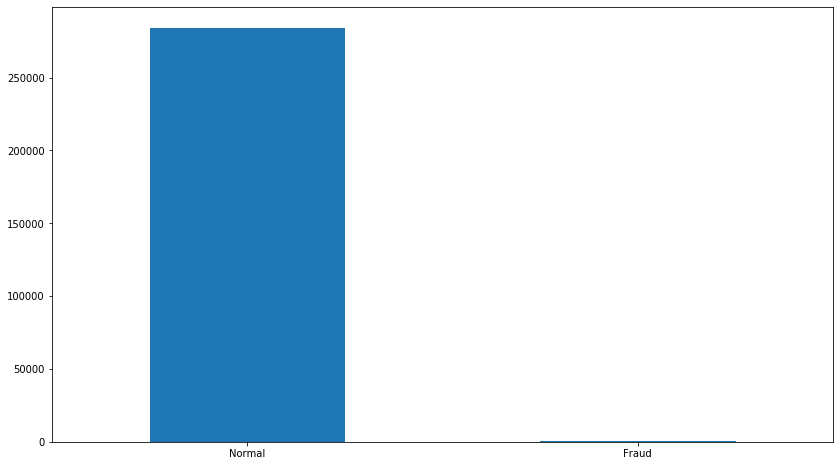

In [37]:
count_class=pd.value_counts(df['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.xticks(range(2),LABELS)
xlable=('class')
ylable=('frquency')

In [38]:
data=df.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


In [39]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [40]:
fraud.shape

(492, 31)

In [41]:
normal.shape

(284314, 31)

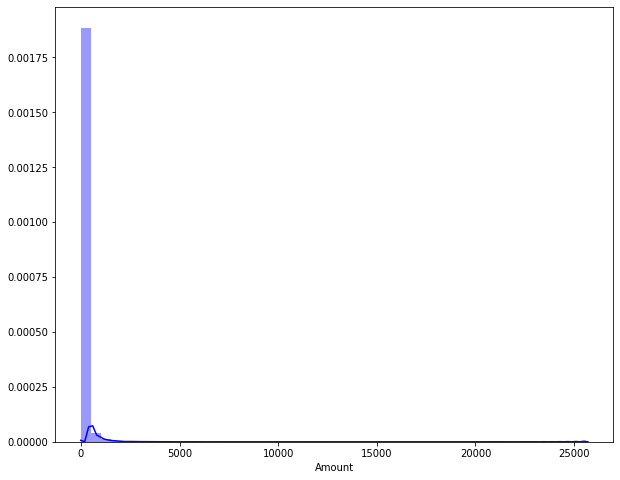

In [42]:
#normal.Aount.describe()
#fraud.Amount.describe()
plt.figure(figsize=(10,8))
sns.distplot(df['Amount'],color='blue')

from above amount distribution curve I found that the number of higher amount transaction is very low.So,there is high probability of huge transaction to be fraudulent.

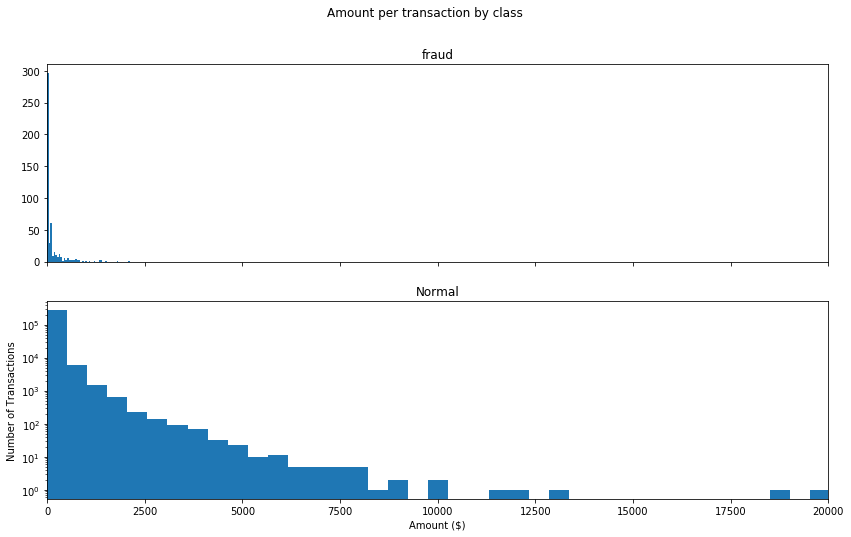

In [27]:
#Let's have a more graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

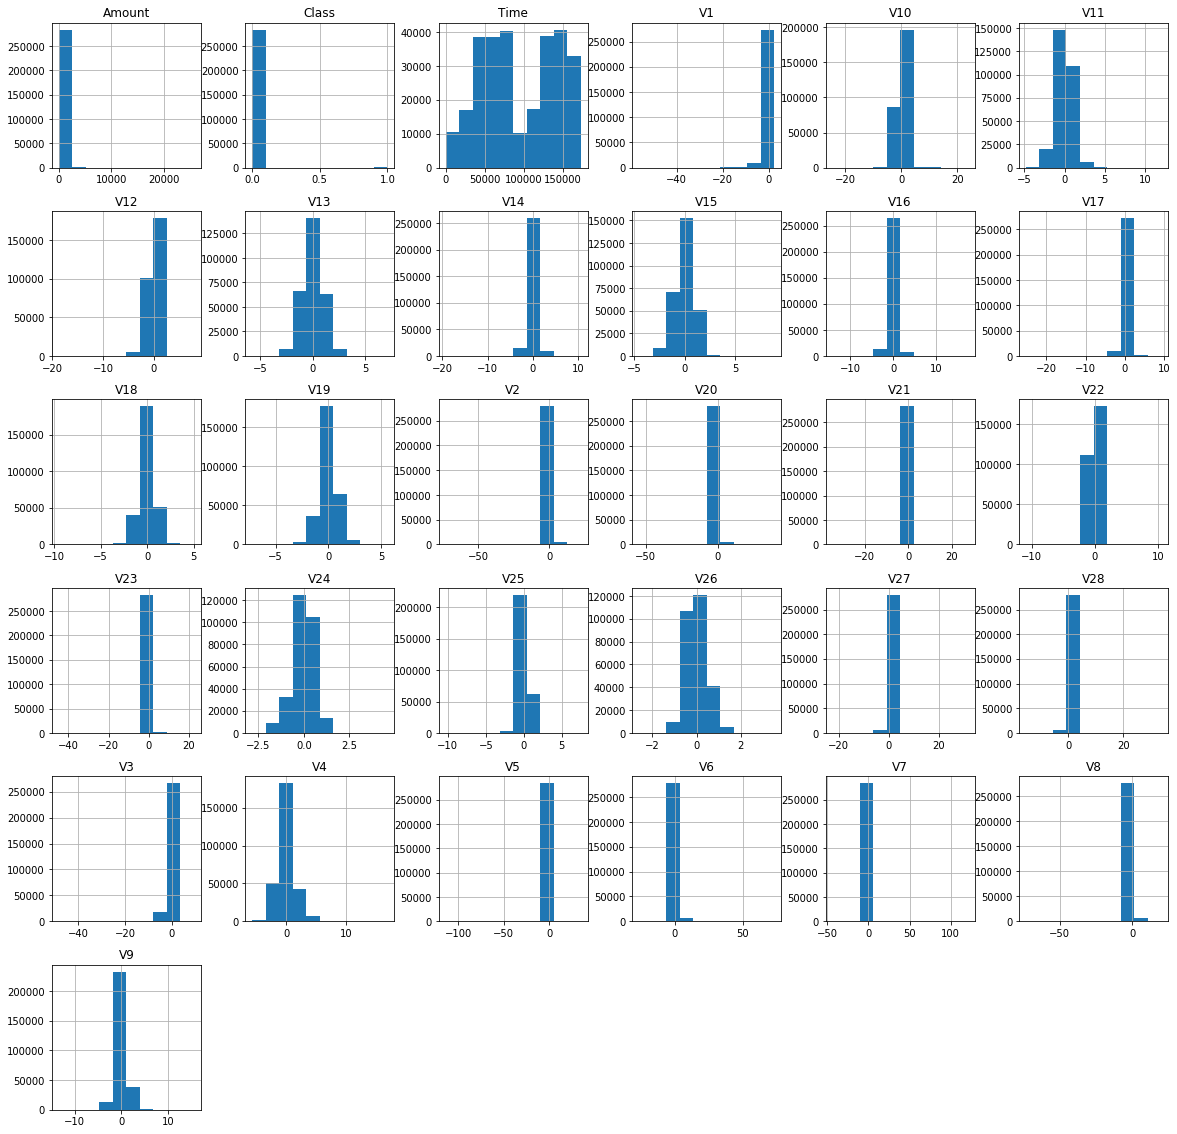

In [48]:
#let check the distribution of each attribute
df.hist(figsize=(20,20))
plt.show()

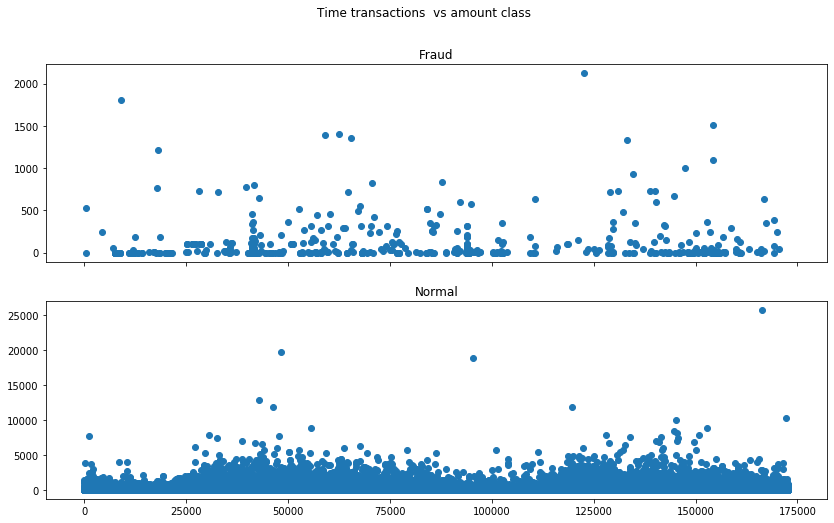

In [45]:
#other graphical representation 
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Time transactions  vs amount class")
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlable=('Time in second')
plt.ylable=('Amount')
plt.show()

 It doesn't seem like the time of transaction really matters here as per above observation.Now let us take a sample of the dataset for modelling and prediction

In [49]:
data.shape

(28481, 31)

In [51]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]
outlier_fraction= len (fraud)/float (len(normal))

In [52]:
outlier_fraction

0.0016529506928325245

In [54]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraud)))
print("Valid Cases : {}".format(len(normal)))

0.0016529506928325245
Fraud Cases : 47
Valid Cases : 28434


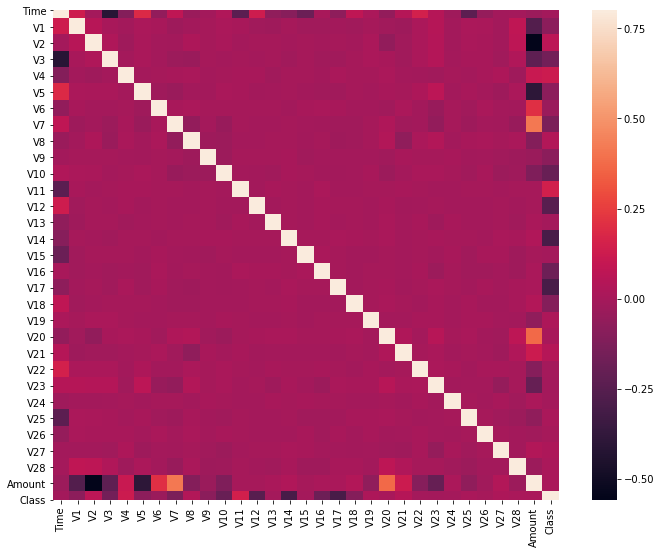

In [55]:
#Correlation Matrix

correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

In [62]:
#Now we will divide the dependent and independent variable for model prediction
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target="Class"
state=np.random.RandomState(42)
x=data[columns]
y=data[target]
X_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape,y.shape)


(28481, 30) (28481,)


In [73]:
#model building step
classifiers={
    "Isolation Forest":IsolationForest(n_estimators=100,max_samples=len(x),contamination=outlier_fraction,
                                      verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',
                                             p=2,metric_params=None,contamination=outlier_fraction),
    "support Vector Machine":OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

   

In [76]:
#Fit the model

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(x)
        y_pred = clf.predict(x)
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 67
Accuracy Score :
0.9976475545100242
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.29      0.30      0.29        47

    accuracy                           1.00     28481
   macro avg       0.65      0.65      0.65     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 93
Accuracy Score :
0.9967346652154068
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.02      0.02      0.02        47

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

support Vector Machine: 8411
Accuracy Score :
0.7046803131912504
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.71   

Observations :

Isolation Forest detected 67 errors versus Local Outlier Factor detecting 93 errors vs. SVM detecting 8411 errors

Isolation Forest has a 99.75% more accurate than LOF of 99.67% and SVM of 70.46

When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 29 % versus LOF detection rate of just 2 % and SVM of 0

So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases